In [5]:
import pandas as pd
import numpy as np

## EDA 

In [6]:
data = pd.read_csv("data/fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
#I wanted to see if there"s missmatched text content in the columns
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
data.shape

(17880, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [10]:
print("Are there any missing values? :",data.isna().any().any())
print(data.isna().sum())

Are there any missing values? : True
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [11]:
print("Are there any duplicated values? :",data.duplicated().any())
print(data.duplicated().sum())

Are there any duplicated values? : False
0


In [12]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [13]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


### Countplots and fraudulent Wordclouds

In [14]:
data_1 = data.copy()
data_1 = data_1.drop(["job_id"], axis = 1)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

I will use countplots to visualize most common words in categorical columns, which are not whole sentences/paragraphs, from fraudulent offers against real ones.

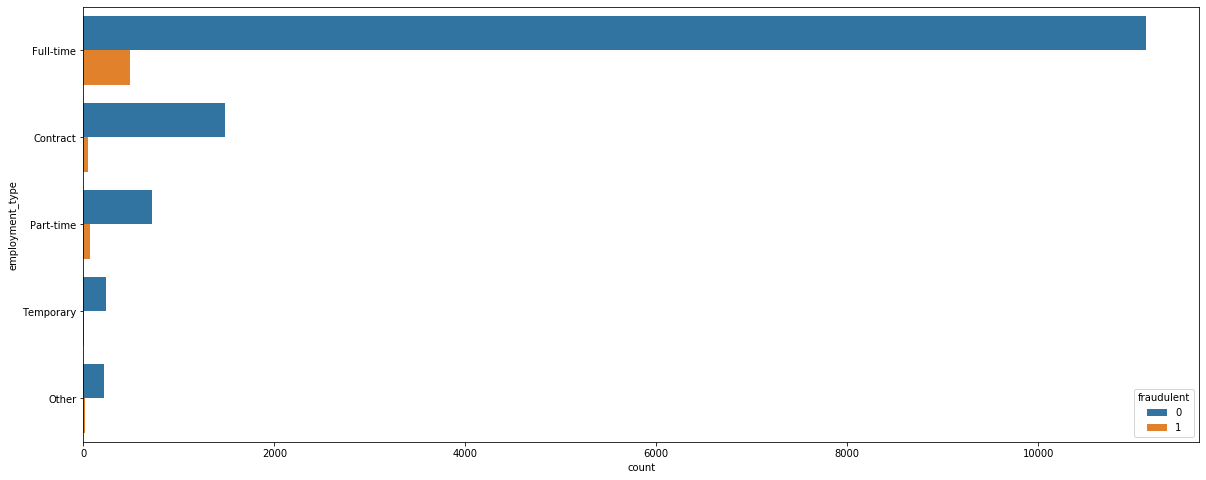

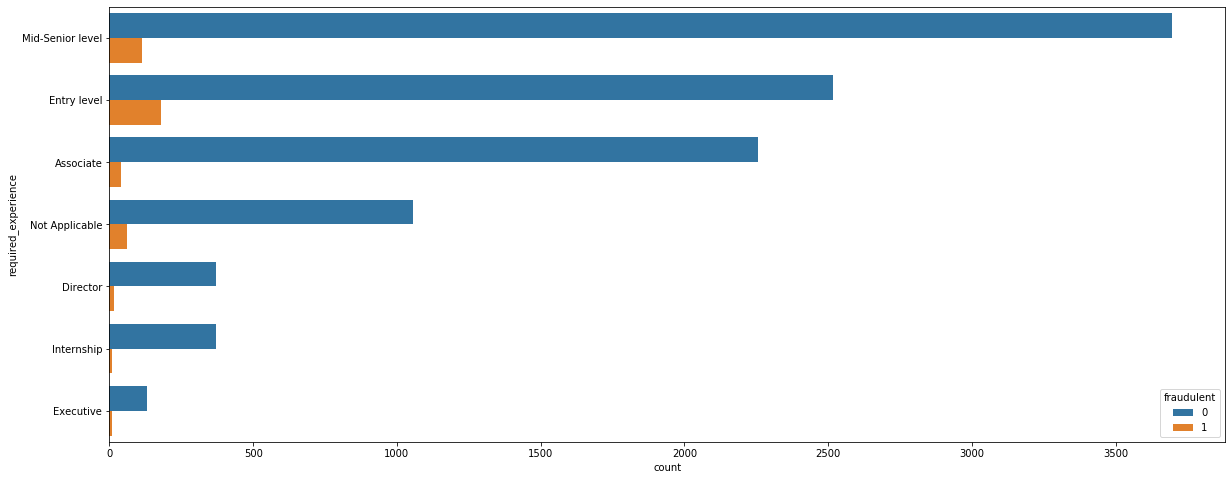

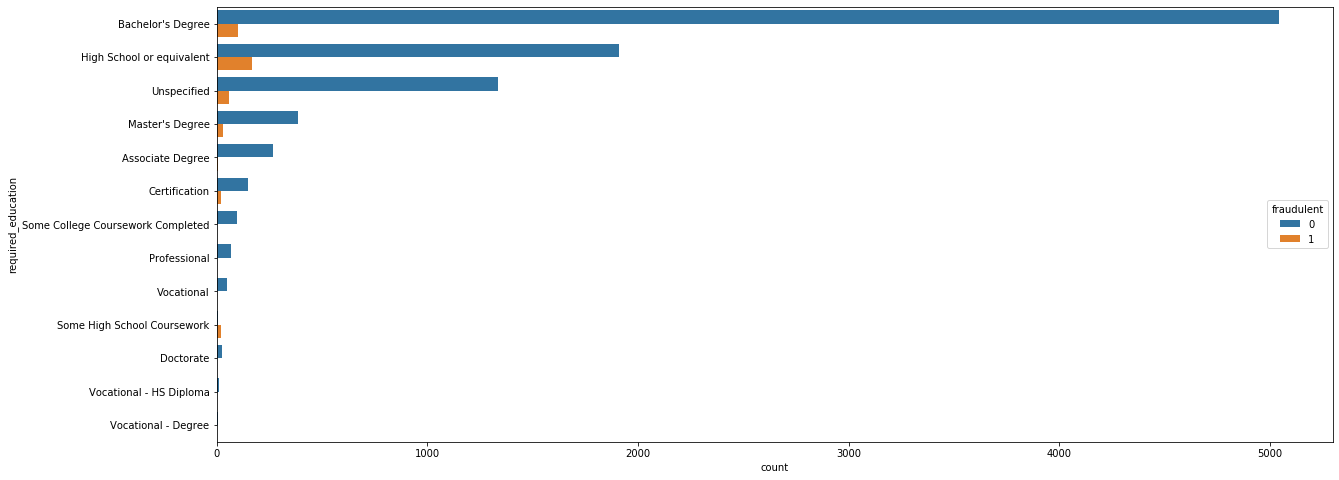

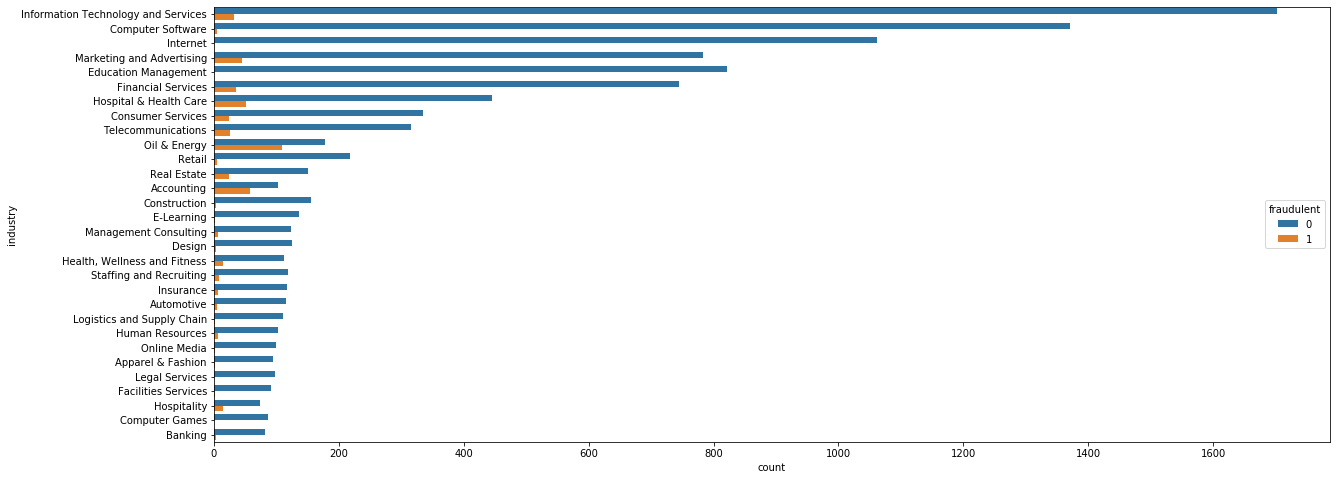

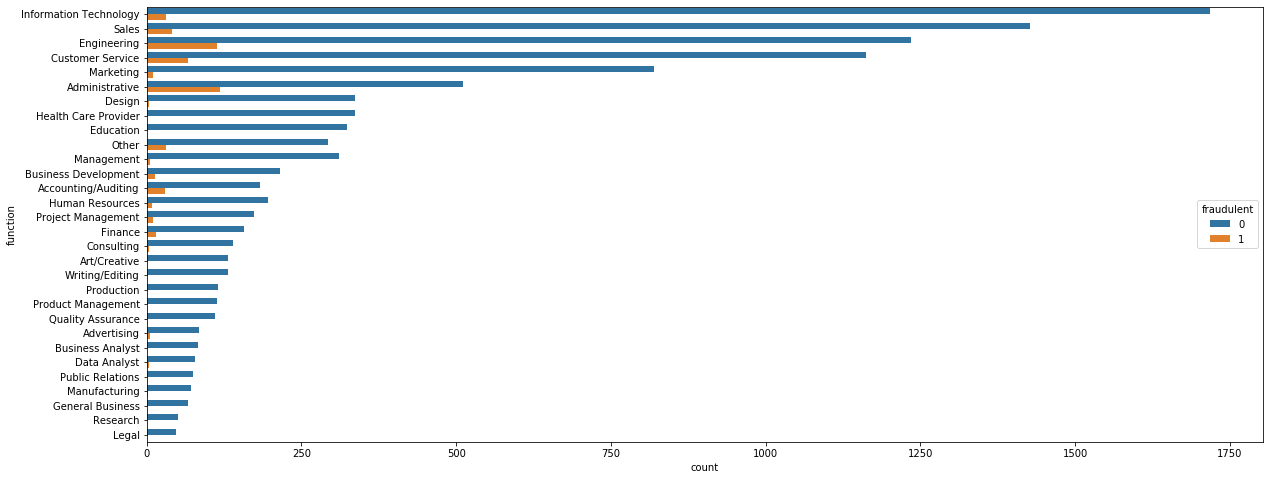

In [16]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="employment_type",data=data_1,
                   order=data_1.employment_type.value_counts().iloc[:30].index)

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="required_experience",data=data_1,
                   order=data_1.required_experience.value_counts().iloc[:30].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="required_education",data=data_1,
                   order=data_1.required_education.value_counts().iloc[:30].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="industry",data=data_1,
                   order=data_1.industry.value_counts().iloc[:30].index)

fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="function",data=data_1,
                   order=data_1.function.value_counts().iloc[:30].index)


plt.show()

I will use wordclouds to visualize most common words in categorical columns which are whole sentences/paragraphs from fraudulent offers.

In [17]:
data_1 = data_1.loc[data_1["fraudulent"]==1]

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
for value in data_1[["title","department","company_profile","description","requirements","benefits"]]:
    data_1[value]= data_1[value].astype(str, errors="ignore")

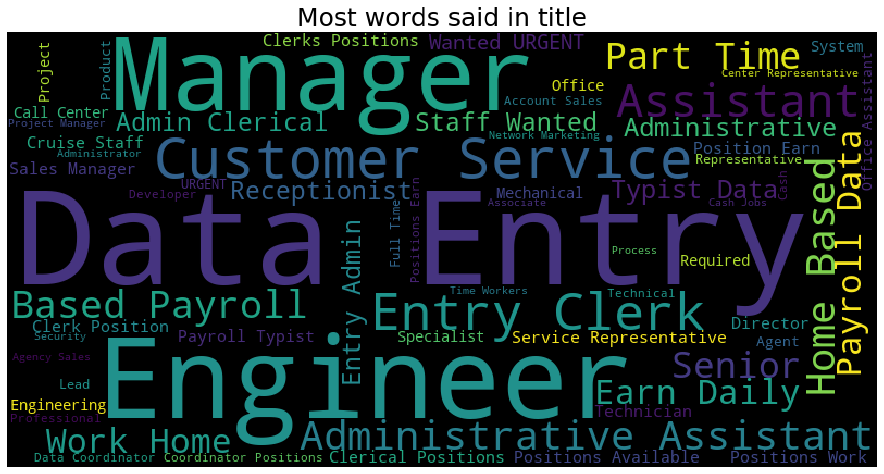

In [20]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["title"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in title", fontsize=25)
plt.show()

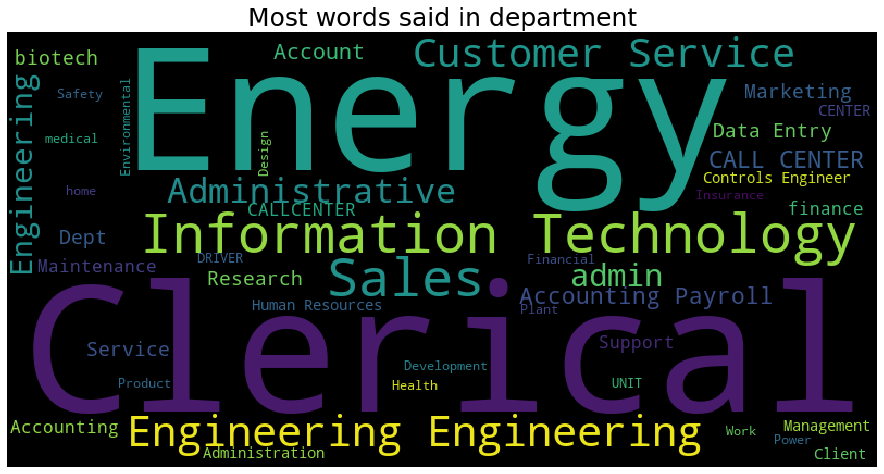

In [22]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["department"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in department", fontsize=25)
plt.show()

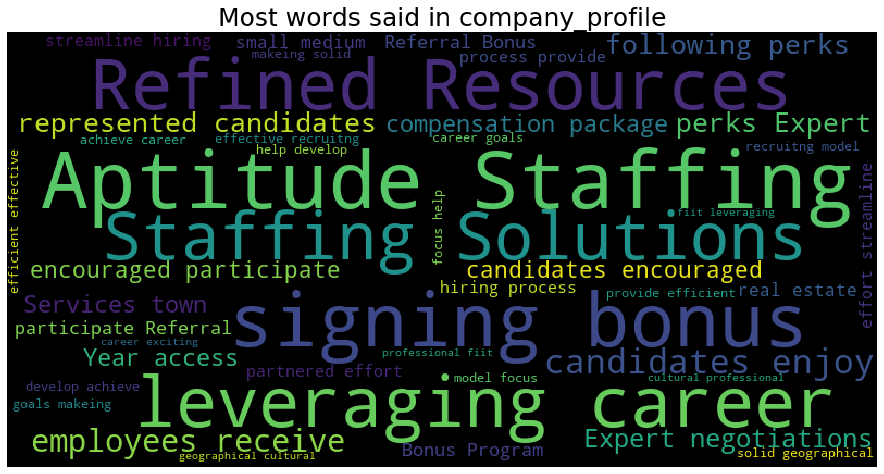

In [23]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["company_profile"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in company_profile", fontsize=25)
plt.show()

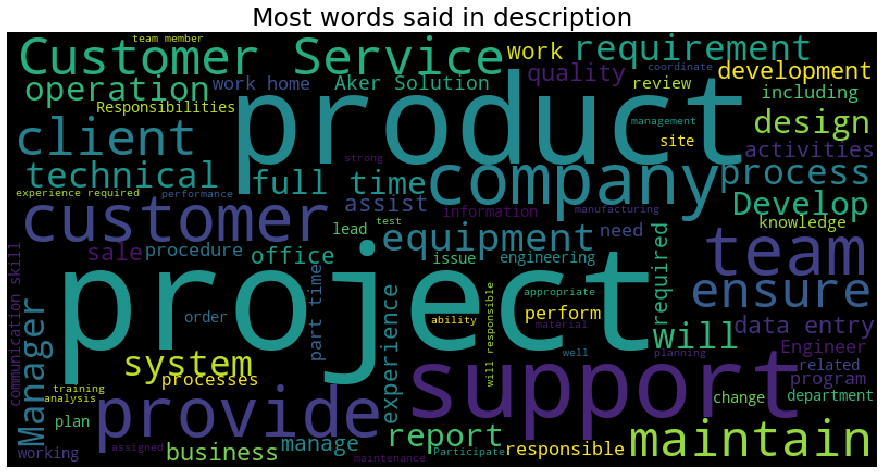

In [24]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["description"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in description", fontsize=25)
plt.show()

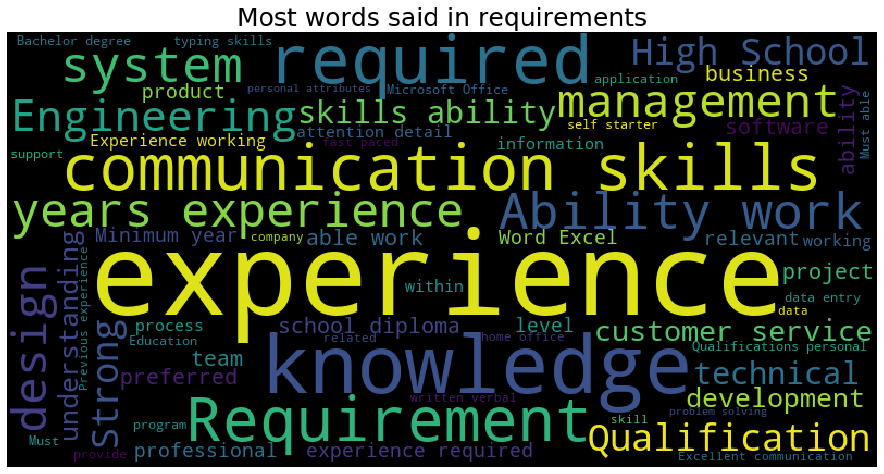

In [25]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10, max_words=150, 
                      repeat=False,min_word_length=4).generate(" ".join(data_1["requirements"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in requirements", fontsize=25)
plt.show()

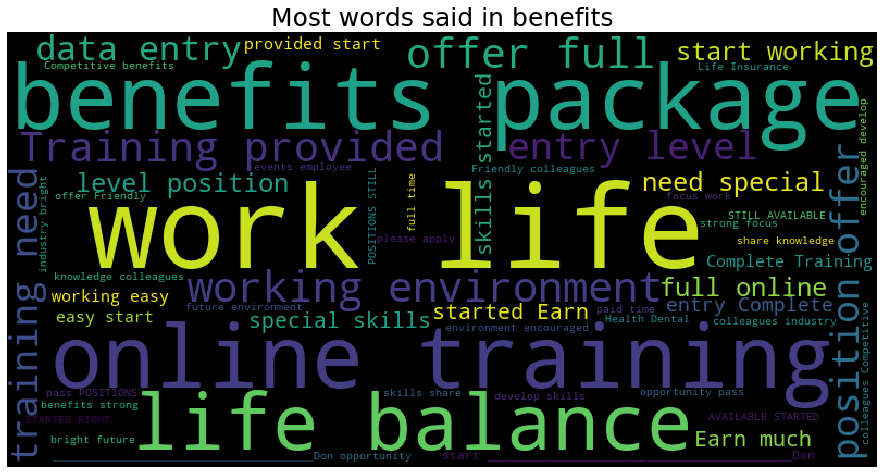

In [26]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10, max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["benefits"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in benefits", fontsize=25)
plt.show()

### One Hot Encoding for Categorical Columns and Logistic Regression

I will use One Hot Encoding to get dummies from most common words in categorical columns, which are not whole sentences/paragraphs, from fraudulent offers against real ones.

In [113]:
data_2 = data.copy()
data_2 = data_2.drop(["job_id"], axis = 1)

In [114]:
data_2.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [115]:
categorical_columns = data_2[["employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]

In [116]:
categorical_columns.head()

,employment_type,required_experience,required_education,industry,function,fraudulent
0,Other,Internship,NaN,NaN,Marketing,0
1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,NaN,NaN,NaN,NaN,NaN,0
3,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [117]:
categorical_columns_filled = categorical_columns.fillna("Other")


In [118]:
categorical_columns = "employment_type", "required_experience", "required_education", "industry", "function"

for column in categorical_columns:
    categorical_columns_filled[column] = categorical_columns_filled[column].str.lower() 
    categorical_columns_filled.columns = map(str.lower, categorical_columns_filled.columns)

In [119]:
categorical_columns_filled.head()

,employment_type,required_experience,required_education,industry,function,fraudulent
0,other,internship,other,other,marketing,0
1,full-time,not applicable,other,marketing and advertising,customer service,0
2,other,other,other,other,other,0
3,full-time,mid-senior level,bachelor's degree,computer software,sales,0
4,full-time,mid-senior level,bachelor's degree,hospital & health care,health care provider,0


In [120]:
vals_to_replace = {"not applicable":"other", "mid-senior level":"associate", "director":"executive"}
categorical_columns_filled["required_experience"] = categorical_columns_filled["required_experience"].replace(vals_to_replace)


vals_to_replace = {"unspecified":"other","some high school coursework":"high school or equivalent",
                   "vocational - hs diploma":"high school or equivalent", "mid-senior level":"associate",
                   "some college coursework completed":"associate degree", "professional":"vocational",
                   "vocational - degree":"vocational","certification":"vocational"}
categorical_columns_filled["required_education"] = categorical_columns_filled["required_education"].replace(vals_to_replace)


vals_to_replace = {"design":"marketing", "public relations":"marketing", "advertising":"marketing", "art/creative":"marketing", 
                   "financial analyst":"finance", "accounting/auditing":"finance","financial analyst":"finance",
                   "training":"human resources","data analyst":"information technology","supply chain":"production",
                   "manufacturing":"production", "quality assurance":"production","project management":"management",
                   "product management":"management", "strategy/planning": "management","sales":"business development",
                   "general business":"business development", "business analyst":"business development",
                   "purchasing":"business development","research":"research and development",
                   "science":"research and development"}
categorical_columns_filled["function"] = categorical_columns_filled["function"].replace(vals_to_replace)


categorical_columns_clean = categorical_columns_filled.drop(columns=["industry"],axis=1) 
categorical_columns_clean.head()

,employment_type,required_experience,required_education,function,fraudulent
0,other,internship,other,marketing,0
1,full-time,other,other,customer service,0
2,other,other,other,other,0
3,full-time,associate,bachelor's degree,business development,0
4,full-time,associate,bachelor's degree,health care provider,0


In [121]:
categorical_column = ["employment_type", "required_experience", "required_education", "function"]

for column in categorical_column:
    categorical_columns_coded = pd.get_dummies(categorical_columns_clean[column])
    data_2_clean = pd.concat([categorical_columns_clean, encoded], axis=1)
    
data_2_clean.head()

,employment_type,required_experience,required_education,function,fraudulent,administrative,business development,consulting,customer service,distribution,...,health care provider,human resources,information technology,legal,management,marketing,other,production,research and development,writing/editing
0,other,internship,other,marketing,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,full-time,other,other,customer service,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,other,other,other,other,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,full-time,associate,bachelor's degree,business development,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,full-time,associate,bachelor's degree,health care provider,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [122]:
data_2_clean.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

#### REGRESION LOGÍSTICA 

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [124]:
# Cargamos el modelo de Regresion Logistica
lr = LogisticRegression()

In [125]:
data_2_clean.dtypes

employment_type             object
required_experience         object
required_education          object
function                    object
fraudulent                   int64
administrative               uint8
business development         uint8
consulting                   uint8
customer service             uint8
distribution                 uint8
education                    uint8
engineering                  uint8
finance                      uint8
health care provider         uint8
human resources              uint8
information technology       uint8
legal                        uint8
management                   uint8
marketing                    uint8
other                        uint8
production                   uint8
research and development     uint8
writing/editing              uint8
dtype: object

In [126]:
# Split dataset in train/split
data_ma2 = data_2_clean.drop(["employment_type", "required_experience", "required_education", "function"], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(data_ma2.drop(columns="fraudulent"), data_ma2["fraudulent"], test_size=0.2, random_state=42)

In [127]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
lr.score(x_test, y_test) #balancear

0.9493847874720358

In [129]:
predict = lr.predict(x_test)

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict) #especifidad --> preferencia en indentificar los fraudes correctamente (minimizar los falsos positivos)

array([[3395,    0],
       [ 181,    0]], dtype=int64)

In [ ]:
# Conclusion Natural Language Processing

In [131]:
y_train.head()

2112     0
7571     0
764      0
17291    0
16069    0
Name: fraudulent, dtype: int64

In [132]:
data_ma2.head()

,fraudulent,administrative,business development,consulting,customer service,distribution,education,engineering,finance,health care provider,human resources,information technology,legal,management,marketing,other,production,research and development,writing/editing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [133]:
data_ma2.corr()

,fraudulent,administrative,business development,consulting,customer service,distribution,education,engineering,finance,health care provider,human resources,information technology,legal,management,marketing,other,production,research and development,writing/editing
fraudulent,1.000000,0.125031,-0.029191,-0.008670,0.007697,0.013075,-0.028747,0.047078,0.049718,-0.029404,-0.006231,-0.045269,-0.011582,-0.020679,-0.048494,0.021809,-0.027438,-0.013522,-0.019457
administrative,0.125031,1.000000,-0.065177,-0.017220,-0.051920,-0.007006,-0.026003,-0.054571,-0.029531,-0.026527,-0.022432,-0.064550,-0.009811,-0.037414,-0.057155,-0.149358,-0.026487,-0.011454,-0.016481
business development,-0.029191,-0.065177,1.000000,-0.030730,-0.092656,-0.012503,-0.046404,-0.097386,-0.052702,-0.047341,-0.040032,-0.115196,-0.017509,-0.066768,-0.102000,-0.266544,-0.047269,-0.020441,-0.029412
consulting,-0.008670,-0.017220,-0.030730,1.000000,-0.024480,-0.003303,-0.012260,-0.025730,-0.013924,-0.012508,-0.010577,-0.030435,-0.004626,-0.017640,-0.026949,-0.070422,-0.012489,-0.005401,-0.007771
customer service,0.007697,-0.051920,-0.092656,-0.024480,1.000000,-0.009960,-0.036966,-0.077578,-0.041982,-0.037712,-0.031889,-0.091765,-0.013947,-0.053188,-0.081253,-0.212329,-0.037655,-0.016283,-0.023430
distribution,0.013075,-0.007006,-0.012503,-0.003303,-0.009960,1.000000,-0.004988,-0.010469,-0.005665,-0.005089,-0.004303,-0.012383,-0.001882,-0.007177,-0.010965,-0.028653,-0.005081,-0.002197,-0.003162
education,-0.028747,-0.026003,-0.046404,-0.012260,-0.036966,-0.004988,1.000000,-0.038853,-0.021026,-0.018887,-0.015971,-0.045958,-0.006985,-0.026638,-0.040693,-0.106340,-0.018858,-0.008155,-0.011734
engineering,0.047078,-0.054571,-0.097386,-0.025730,-0.077578,-0.010469,-0.038853,1.000000,-0.044126,-0.039637,-0.033518,-0.096450,-0.014659,-0.055903,-0.085401,-0.223170,-0.039577,-0.017115,-0.024626
finance,0.049718,-0.029531,-0.052702,-0.013924,-0.041982,-0.005665,-0.021026,-0.044126,1.000000,-0.021450,-0.018138,-0.052195,-0.007933,-0.030253,-0.046216,-0.120771,-0.021418,-0.009262,-0.013327
health care provider,-0.029404,-0.026527,-0.047341,-0.012508,-0.037712,-0.005089,-0.018887,-0.039637,-0.021450,1.000000,-0.016293,-0.046886,-0.007126,-0.027175,-0.041515,-0.108486,-0.019239,-0.008320,-0.011971


### Create TF IDF Features

I will use TF IDF to count how frequent are words in categorical columns which are whole sentences/paragraphs or there is too much variability.

In [134]:
data_3 = data.copy()
data_3 = data_3.drop(["job_id"], axis = 1)

In [135]:
columns = ["title","company_profile","description","requirements","benefits"]
for column in columns:
    data_3[column] = data_3[column].fillna("")

def extract_features(data_3):    
    for column in columns:
        data_3[column+"_len"] = data_3[column].apply(lambda x : len(str(x)))
        data_3[column+"_wc"] = data_3[column].apply(lambda x : len(str(x.split())))
extract_features(data_3)

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_3["combined_text"] = data_3["company_profile"] + " " + data_3["description"] + " " + data_3["requirements"] + " " + data_3["benefits"]

n_features = {
    "title" : 100,
    "combined_text" : 500
}

for column, n in n_features.items():
    tfidf = TfidfVectorizer(max_features=n, norm="l2", stop_words ="english")
    tfidf.fit(data_3[column])
    tfidf_train = np.array(tfidf.transform(data_3[column]).toarray(), dtype=np.float16)

    for word in range(n_features[column]):
        data_3[column + "_tfidf_" + str(word)] = tfidf_train[:, word]

In [137]:
data_3.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,combined_text_tfidf_490,combined_text_tfidf_491,combined_text_tfidf_492,combined_text_tfidf_493,combined_text_tfidf_494,combined_text_tfidf_495,combined_text_tfidf_496,combined_text_tfidf_497,combined_text_tfidf_498,combined_text_tfidf_499
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,...,0.0,0.0,0.000000,0.069458,0.092590,0.000000,0.0,0.000000,0.000000,0.000000
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,0.0,0.0,0.000000,0.030350,0.080872,0.068787,0.0,0.000000,0.000000,0.000000
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,...,0.0,0.0,0.078735,0.061859,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,0.0,0.0,0.000000,0.060822,0.000000,0.137817,0.0,0.037109,0.040436,0.025864
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,0.0,0.0,0.000000,0.023392,0.031174,0.000000,0.0,0.000000,0.000000,0.029831


In [138]:
data_3.dtypes

title                       object
location                    object
department                  object
salary_range                object
company_profile             object
                            ...   
combined_text_tfidf_495    float16
combined_text_tfidf_496    float16
combined_text_tfidf_497    float16
combined_text_tfidf_498    float16
combined_text_tfidf_499    float16
Length: 628, dtype: object

#### REGRESION LOGÍSTICA 

In [139]:
# Split dataset in train/split
data_ma3 = data_3.drop(["title", "location", "department", "salary_range", "company_profile", "description", "requirements", "benefits"], axis = 1)
data_ma3.columns = ["".join (column if column.isalnum() else "_" for column in str(x)) for x in data_ma3.columns] 


for column in data_ma3.columns:
    data_ma3[column]= data_ma3[column].astype(float, errors="ignore")

x_train, x_test, y_train, y_test = train_test_split(data_ma3.drop(columns="fraudulent"), data_ma3["fraudulent"], test_size=0.2, random_state=42)

In [140]:
lr.score(x_test, y_test) #balancear

ValueError: could not convert string to float: 'Full-time'

In [ ]:
predict = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict) #especifidad --> preferencia en indentificar los fraudes correctamente (minimizar los falsos positivos)

In [ ]:
# Conclusion Natural Language Processing

In [ ]:
y_train.head()

In [ ]:
data_ma3.head()

In [ ]:
data_ma3.corr()